## The Android App Market on Google Play

Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this project, you will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. You'll look for insights in the data to devise strategies to drive growth and retention.

### Columns description:

<b>App:</b> Application name

<b>Category:</b> Category the app belongs to

<b>Rating:</b> Overall user rating of the app (as when scraped)

<b>Reviews:</b> Number of user reviews for the app (as when scraped)

<b>Installs:</b> Number of user downloads/installs for the app (as when scraped)

<b>Type:</b> Paid or Free

<b>Content Rating:</b> Age group the app is targeted at - Children / Mature 21+ / Adult

<b>Genres:</b> An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.


<b>Last Updated:</b> Date when the app was last updated on Play Store (as when scraped)

<b>Current Ver:</b> Current version of the app available on Play Store (as when scraped)

<b>Android Ver:</b> Min required Android version (as when scraped)



## Import packages and load the dataset

In [53]:
# PACKAGES 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# READING CSV FILES
Applications = pd.read_csv('googleplaystore.csv')
User_Reviews = pd.read_csv('googleplaystore_user_reviews.csv')
Applications.sample(50)
Applications.shape

(10841, 13)

In [3]:
# Removing duplicates from rows
Applications = Applications.drop_duplicates(subset ="App")

Applications

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [4]:
# Checking all the duplicates have been removed
Applications.duplicated(subset = "App").any()

False

In [5]:
c = 0
for row in range(Applications.shape[0]):
    if 'Varies with device' in str(Applications.iloc[row, 4]):
        c+=1
print(c)        


1227


In [6]:
# Removing unneeded columns from Applications dataset Last updated, Current Ver and Android Ver
Applications = Applications.drop(['Current Ver', 'Android Ver'], axis = 1)
Applications.sample(6)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
9111,Ouedkniss,SHOPPING,4.3,10355,847k,"1,000,000+",Free,0,Teen,Shopping,"June 19, 2018"
5706,Baby Monitor AV,COMMUNICATION,3.3,1434,9.5M,"100,000+",Free,0,Everyone,Communication,"March 6, 2014"
1394,MyPlate Calorie Tracker,HEALTH_AND_FITNESS,4.6,24094,18M,"1,000,000+",Free,0,Everyone,Health & Fitness,"July 9, 2018"
7672,Cestovné poriadky CP,MAPS_AND_NAVIGATION,4.6,2681,6.3M,"100,000+",Free,0,Everyone,Maps & Navigation,"September 25, 2017"
4505,Q Link Wireless Zone,PRODUCTIVITY,4.0,2194,17M,"500,000+",Free,0,Everyone,Productivity,"March 8, 2018"
8182,MadLipz,FAMILY,4.6,171017,13M,"10,000,000+",Free,0,Teen,Entertainment,"July 22, 2018"


In [7]:
# Number of missing values per column in Applications dataset
missing_values_count_Applications = Applications.isnull().sum()
missing_values_count_Applications

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
dtype: int64

In [8]:
# Replacing NaNs in Type and Content Rating columns with the value before it because there is only one null in each column

Type = Applications['Type'].fillna(method = 'bfill')
Content_Rating = Applications['Content Rating'].fillna(method = 'bfill')
Applications['Type'] = Type
Applications['Content Rating'] = Content_Rating

In [9]:
User_Reviews.sample(6)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
25561,Checkout 51: Grocery coupons,NaN,NaN,NaN,NaN
43164,Facetune - Ad Free,NaN,NaN,NaN,NaN
1179,7 Minute Workout,NaN,NaN,NaN,NaN
44999,Fast Secure VPN,Amazing VPN Reliable service. Offers unique lo...,Positive,0.395000,0.740000
26365,Christian Dating For Free App,Great resource meet people like faith. You mee...,Positive,0.500000,0.675000
17239,Box,Thank Box keeping account wonderful pictures s...,Positive,0.597222,0.747222


In [10]:
# Number of missing values per column in User_Reviews dataset
missing_values_count_User_Reviews = User_Reviews.isnull().sum()
missing_values_count_User_Reviews

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [11]:
# Removing all rows with NaN values
User_reviews_Without_Missing_Values = User_Reviews.dropna() 

In [12]:
# Approximating sentiment columns to 2 decimal places
User_reviews_Without_Missing_Values = User_reviews_Without_Missing_Values.round(1)
User_reviews_Without_Missing_Values.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.0,0.5
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.2,0.3
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.4,0.9
4,10 Best Foods for You,Best idea us,Positive,1.0,0.3
5,10 Best Foods for You,Best way,Positive,1.0,0.3


In [13]:
# The Rating col in Applications datasets contains many NaN values, 
#since we have User_Reviews dataset we will classify the sentiment column in a rating from 1 to 5 and 
#then take the mean

Rating_Of_User_Review = []
for sentiment in User_reviews_Without_Missing_Values["Sentiment_Polarity"]:
    if -1 <= sentiment <= -0.6:
        Rating_Of_User_Review.append(1)
    elif -0.5 <= sentiment <= -0.1:
        Rating_Of_User_Review.append(2)
    elif 0.1 <= sentiment <= 0.5:
        Rating_Of_User_Review.append(4)
    elif 0.6 <= sentiment <= 1:
        Rating_Of_User_Review.append(5)
    else:
        Rating_Of_User_Review.append(3)
        
User_reviews_Without_Missing_Values["Rating"] = Rating_Of_User_Review
User_reviews_Without_Missing_Values.head(25)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Rating
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.0,0.5,5
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.2,0.3,4
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.4,0.9,4
4,10 Best Foods for You,Best idea us,Positive,1.0,0.3,5
5,10 Best Foods for You,Best way,Positive,1.0,0.3,5
6,10 Best Foods for You,Amazing,Positive,0.6,0.9,5
8,10 Best Foods for You,"Looking forward app,",Neutral,0.0,0.0,3
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.0,0.0,3
10,10 Best Foods for You,good you.,Positive,0.7,0.6,5
11,10 Best Foods for You,Useful information The amount spelling errors ...,Positive,0.2,0.1,4


In [14]:
# Average Rating of each app in User_reviews_Without_Missing_Values dataset

mean = User_reviews_Without_Missing_Values.groupby('App', as_index=False)['Rating'].mean()
User_reviews_Mean_Rating = pd.DataFrame(mean)
User_reviews_Mean_Rating.columns = ['App', 'Mean Rating']
User_reviews_Mean_Rating.sample(6)

,App,Mean Rating
378,ColorNote Notepad Notes,3.946565
657,Free Dating & Flirt Chat - Choice of Love,3.085714
139,Asphalt 8: Airborne,3.027397
709,GUNSHIP BATTLE: Helicopter 3D,3.088235
752,Google PDF Viewer,3.275000
681,Fruits Bomb,3.670886


In [15]:
AppTest = Applications.copy()
MeanTest = User_reviews_Mean_Rating.copy()

In [16]:
merged = pd.merge(AppTest, MeanTest,  how='left')
merged = merged.drop(['Category', 'Size', 'Reviews', 'Installs', 'Type', 'Price','Last Updated', 'Content Rating', 'Genres'], axis=1)
merged.sample(6)

,App,Rating,Mean Rating
7725,DS - xR,NaN,NaN
219,Job Korea - Career Jobs,4.3,NaN
6417,211:CK,5.0,NaN
8634,Nose Surgery ER Simulator Lite,3.1,NaN
2999,Podcast Addict,4.6,NaN
2470,Skiplagged — Exclusive Flights & Hotels,4.6,NaN


In [17]:
# Removing NaNs in rating

for row in range (merged.shape[0]):
    if not (1 <= merged.iloc[row, 1] <= 19):
        merged.iloc[row, 1] = merged.iloc[row, 2]
    

In [18]:
merged.isnull().sum() # same result as before

App               0
Rating         1463
Mean Rating    8844
dtype: int64

In [19]:
# We discovered that there is arow with missplaced values over columns

Applications = Applications.drop(Applications[Applications.Installs == 'Free'].index)


Applications = Applications.drop(Applications[Applications['Last Updated'] == '1.0.19'].index)



In [20]:
# Removing unneeded characters [',', '$', '+'] in Installs and Price columns and converting them into numeric columns

cols_to_clean = ['Installs', 'Price']
for col in cols_to_clean:
    Applications[col] = Applications[col].str.replace(',', '')
    Applications[col] = Applications[col].str.replace('$', '')
    Applications[col] = Applications[col].str.replace('+', '')
    Applications[col] = pd.to_numeric(Applications[col], errors='ignore')

# Removing unneeded characters ['M', 'k', 'G'] in size column and converting all the values to MB unit

for row in range(Applications.shape[0]):
    if 'M' in str(Applications.iloc[row, 4]):
        value = Applications.iloc[row, 4].replace('M', '')
        value = float(value)
        #value = value * 1000000
        Applications.iloc[row, 4] = value
    elif 'k' in str(Applications.iloc[row, 4]):
        value = Applications.iloc[row, 4].replace('k', '')
        value = round(float(value))
        value = (value / 1000)
        Applications.iloc[row, 4] = value
    Applications.iloc[row, 5] = int(Applications.iloc[row, 5])
        
Applications['Size'] = pd.to_numeric(Applications['Size'], errors='ignore')  

In [21]:
Applications.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
2948,Snapseed,PHOTOGRAPHY,4.5,823109,Varies with device,50000000,Free,0.0,Everyone,Photography,"June 29, 2018"
9188,EB Scanner,PRODUCTIVITY,5.0,9,25,50,Free,0.0,Everyone,Productivity,"February 11, 2018"
7992,Archie Comics,COMICS,3.8,5084,6.2,100000,Free,0.0,Everyone,Comics,"June 19, 2018"
3431,Horses Live Wallpaper,PERSONALIZATION,4.2,28806,7.1,1000000,Free,0.0,Everyone,Personalization,"May 22, 2018"
7296,CG Smart,SPORTS,NaN,2,1.5,100,Free,0.0,Everyone,Sports,"August 12, 2016"


In [22]:
# A -  Investigating different app categories

Sum_Of_different_Categories = Applications['Category'].value_counts()
Sum_Of_different_Categories 

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [23]:
# We discovered an unknown category which is 1.9
Applications[Applications.Category == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated


In [24]:
# We discovered an unknown category which is 1.9, so we will replace it with LIFESTYLE because we searched

Applications.loc[Applications['Category'] == '1.9', 'Category'] = 'LIFESTYLE'

In [25]:

Sum_Of_different_Categories = Applications.groupby('Category').first()
Sum_Of_different_Categories['Count'] = Applications['Category'].value_counts()
Sum_Of_different_Categories = Sum_Of_different_Categories.drop(['App', 'Rating', 'Size', 'Reviews', 'Installs', 'Type', 'Price','Last Updated', 'Content Rating', 'Genres'], axis=1)
Sum_Of_different_Categories.reset_index(inplace=True)
Sum_Of_different_Categories = Sum_Of_different_Categories.sort_values(by = 'Count', ascending = False)
Sum_Of_different_Categories

,Category,Count
11,FAMILY,1832
14,GAME,959
29,TOOLS,827
4,BUSINESS,420
20,MEDICAL,395
23,PERSONALIZATION,376
25,PRODUCTIVITY,374
18,LIFESTYLE,369
12,FINANCE,345
28,SPORTS,325


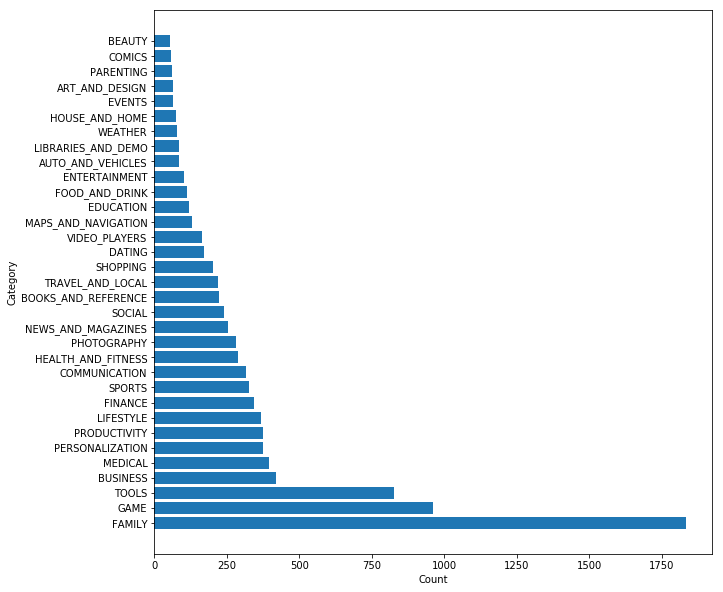

In [26]:
# Looking for top categories
countValues = Sum_Of_different_Categories['Count'].values
categoryValues = Sum_Of_different_Categories['Category'].values

fig = plt.figure(figsize=(10,10))

plt.barh(np.arange(len(countValues)) , countValues)
plt.yticks(np.arange(len(countValues)) , categoryValues )

plt.ylabel('Category')
plt.xlabel('Count')

plt.show()


fig.savefig('Figures/CountsPerCat.jpg')

In [27]:
# Looking for top installed categories

sum = Applications.groupby('Category', as_index=False)['Installs'].sum()
Categories_Sum_Of_Installs = pd.DataFrame(sum)
Categories_Sum_Of_Installs.columns = ['Category', 'Sum']
Categories_Sum_Of_Installs = Categories_Sum_Of_Installs.sort_values(by = 'Sum', ascending = False)
Categories_Sum_Of_Installs

,Category,Sum
14,GAME,13878924415
6,COMMUNICATION,11038276251
29,TOOLS,8001771915
25,PRODUCTIVITY,5793091369
27,SOCIAL,5487867902
24,PHOTOGRAPHY,4649147655
11,FAMILY,4427941505
31,VIDEO_PLAYERS,3926902720
30,TRAVEL_AND_LOCAL,2894887146
21,NEWS_AND_MAGAZINES,2369217760


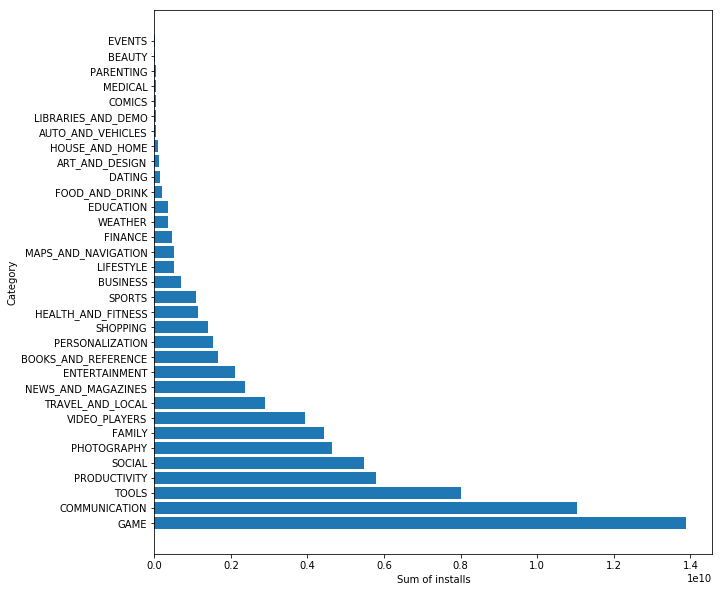

In [28]:
sumValues = Categories_Sum_Of_Installs['Sum'].values
categoryValues = Categories_Sum_Of_Installs['Category'].values

fig = plt.figure(figsize=(10,10))

plt.barh(np.arange(len(countValues)) , sumValues)
plt.yticks(np.arange(len(countValues)) , categoryValues )

plt.ylabel('Category')
plt.xlabel('Sum of installs')

plt.show()


fig.savefig('Figures/SumOfInstallsPerCat.jpg')

In [29]:
import datetime

cols_to_clean = ['Last Updated']
for col in cols_to_clean:
    Applications[col] = Applications[col].str.replace('January', '01')
    Applications[col] = Applications[col].str.replace('February', '02')
    Applications[col] = Applications[col].str.replace('March', '03')
    Applications[col] = Applications[col].str.replace('April', '04')
    Applications[col] = Applications[col].str.replace('May', '05')
    Applications[col] = Applications[col].str.replace('June', '06')
    Applications[col] = Applications[col].str.replace('July', '07')
    Applications[col] = Applications[col].str.replace('August', '08')
    Applications[col] = Applications[col].str.replace('September', '09')
    Applications[col] = Applications[col].str.replace('October', '10')
    Applications[col] = Applications[col].str.replace('November', '11')
    Applications[col] = Applications[col].str.replace('December', '12')
    
    Applications[col] = Applications[col].str.replace(' ', '/')
    Applications[col] = Applications[col].str.replace(',', '/')
    Applications[col] = Applications[col].str.replace('//', '/')
    
    Applications[col] = Applications[col].str.replace('/1/', '/01/')
    Applications[col] = Applications[col].str.replace('/2/', '/02/')
    Applications[col] = Applications[col].str.replace('/3/', '/03/')
    Applications[col] = Applications[col].str.replace('/4/', '/04/')
    Applications[col] = Applications[col].str.replace('/5/', '/05/')
    Applications[col] = Applications[col].str.replace('/6/', '/06/')
    Applications[col] = Applications[col].str.replace('/7/', '/07/')
    Applications[col] = Applications[col].str.replace('/8/', '/08/')
    Applications[col] = Applications[col].str.replace('/9/', '/09/')
    Applications[col] = Applications[col].str.replace('/9/', '/09/')
    
#     print(Applications[col].values[0])
    
    
# for i in range( 0 , len(Applications[col].values) ):
#     Applications[col][i] = datetime.datetime.strptime(Applications[col].values[i] , "%m/%d/%Y").strftime("%Y-%m-%d")
    

    
    
    Applications[col] = pd.to_numeric(Applications[col], errors='ignore')

Applications

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,01/07/2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,01/15/2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,08/01/2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0.0,Teen,Art & Design,06/08/2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,06/20/2018
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,03/26/2017
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19,50000,Free,0.0,Everyone,Art & Design,04/26/2018
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29,1000000,Free,0.0,Everyone,Art & Design,06/14/2018
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33,1000000,Free,0.0,Everyone,Art & Design,09/20/2017
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0.0,Everyone,Art & Design;Creativity,07/03/2018


In [30]:
Applications['Last Updated'] = pd.to_datetime(Applications['Last Updated'], format='%m/%d/%Y')  


Applications

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0.0,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,2017-03-26
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19,50000,Free,0.0,Everyone,Art & Design,2018-04-26
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29,1000000,Free,0.0,Everyone,Art & Design,2018-06-14
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33,1000000,Free,0.0,Everyone,Art & Design,2017-09-20
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0.0,Everyone,Art & Design;Creativity,2018-07-03


In [31]:


Applications['Installs'].corr(pd.to_numeric( Applications['Last Updated']))


0.07787303209886995

In [32]:
Applications['Last Updated Numeric'] = pd.to_numeric( Applications['Last Updated'])

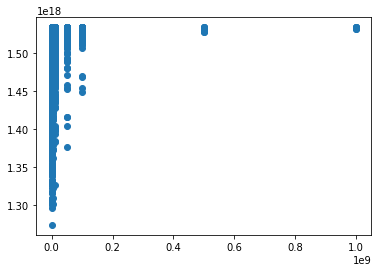

In [33]:

plt.scatter( Applications['Installs'] ,  Applications['Last Updated Numeric'] )
plt.show()



In [34]:
temp1 = Applications[Applications.Size == 'Varies with device']

temp2 = Applications[Applications.Size != 'Varies with device']

temp2[ temp2.Category  == 'FAMILY' ].Size.mean()

temp2['Size'] = pd.to_numeric(temp2["Size"])


temp3 = temp2.groupby('Category', as_index=False)['Size'].mean()

catValues = temp3.Category.values

for i in range(0,len(catValues)):  
    temp1.loc[temp1['Category'] == str(catValues[i]), ['Size']] = float(temp3[temp3[ 'Category' ] == str(catValues[i])].Size) 


Applications[Applications.Size == 'Varies with device'] = temp1   


Applications



/Users/loai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/loai/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Last Updated Numeric
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1515283200000000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,1515974400000000000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1533081600000000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0.0,Teen,Art & Design,2018-06-08,1528416000000000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1529452800000000000
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1490486400000000000
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19,50000,Free,0.0,Everyone,Art & Design,2018-04-26,1524700800000000000
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29,1000000,Free,0.0,Everyone,Art & Design,2018-06-14,1528934400000000000
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,1505865600000000000
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0.0,Everyone,Art & Design;Creativity,2018-07-03,1530576000000000000


In [35]:
Applications["Size"] = pd.to_numeric(Applications["Size"])

Applications

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Last Updated Numeric
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.000000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1515283200000000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,1515974400000000000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700000,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1533081600000000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.000000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,1528416000000000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800000,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1529452800000000000
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.600000,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1490486400000000000
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.000000,50000,Free,0.0,Everyone,Art & Design,2018-04-26,1524700800000000000
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.000000,1000000,Free,0.0,Everyone,Art & Design,2018-06-14,1528934400000000000
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.000000,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,1505865600000000000
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.100000,10000,Free,0.0,Everyone,Art & Design;Creativity,2018-07-03,1530576000000000000


In [36]:
Applications['Size'].corr( Applications['Installs'] )

0.0407415569604376

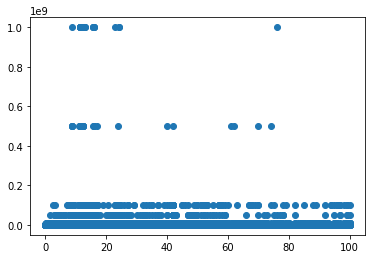

In [37]:
plt.scatter( Applications['Size'] ,  Applications['Installs'] )
plt.show()

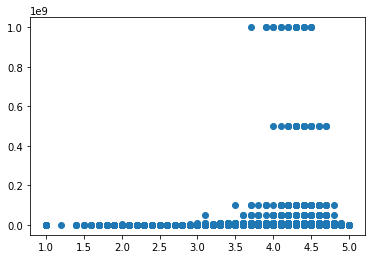

In [38]:
plt.scatter(  Applications['Rating'] , Applications['Installs']  )
plt.show()

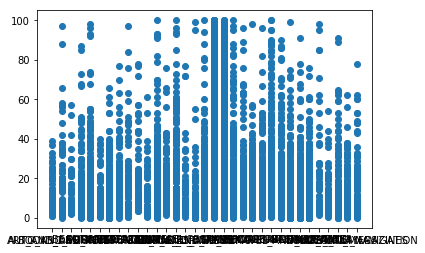

In [39]:
plt.scatter(  Applications['Category'] , Applications['Size']  )
plt.show()

In [40]:
# Genres_unique = Applications["Genres"].unique()
# Genres_unique

# def splitTheGenres(word):
#     return len(word.split(';'))

# genres_unique = np.vectorize(splitTheGenres)
# genres_unique(Genres_unique)


In [41]:
Applications[["genre1", "genre2"]] = Applications["Genres"].str.split(";", expand=True)
Applications["Genres"] = Applications["genre1"]

Applications = Applications.drop(['genre1'], axis = 1)
Applications = Applications.drop(['genre2'], axis = 1)

Applications

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Last Updated Numeric
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.000000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1515283200000000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000000,500000,Free,0.0,Everyone,Art & Design,2018-01-15,1515974400000000000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700000,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1533081600000000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.000000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,1528416000000000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800000,100000,Free,0.0,Everyone,Art & Design,2018-06-20,1529452800000000000
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.600000,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1490486400000000000
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.000000,50000,Free,0.0,Everyone,Art & Design,2018-04-26,1524700800000000000
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.000000,1000000,Free,0.0,Everyone,Art & Design,2018-06-14,1528934400000000000
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.000000,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,1505865600000000000
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.100000,10000,Free,0.0,Everyone,Art & Design,2018-07-03,1530576000000000000


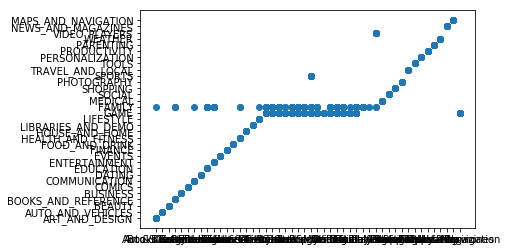

In [42]:
plt.scatter(  Applications['Genres'] , Applications['Category']  )
plt.show()

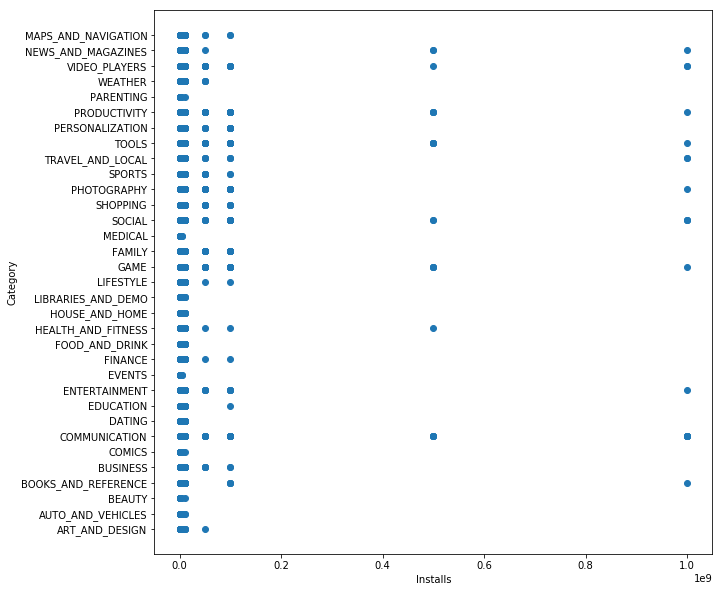

In [49]:
genresValues = Applications['Genres'].values
categoryValues = Applications['Category'].values

fig = plt.figure(figsize=(10,10))

plt.scatter(  Applications['Installs'] , Applications['Category']  )

plt.ylabel('Category')
plt.xlabel('Installs')

plt.show()


# fig.savefig('Figures/genresVScategories.jpg')

In [50]:
Applications.corr()

,Rating,Size,Installs,Price,Last Updated Numeric
Rating,1.000000,0.059092,0.040143,-0.021199,0.130009
Size,0.059092,1.000000,0.040742,-0.021569,0.204846
Installs,0.040143,0.040742,1.000000,-0.009405,0.077873
Price,-0.021199,-0.021569,-0.009405,1.000000,-0.002437
Last Updated Numeric,0.130009,0.204846,0.077873,-0.002437,1.000000


In [ ]:
genresValues = Applications['Genres'].values
categoryValues = Applications['Category'].values

fig = plt.figure(figsize=(10,10))

plt.scatter(  Applications['Installs'] , Applications['Category']  )

plt.ylabel('Category')
plt.xlabel('Installs')

plt.show()

